# Predicting Heart Arrythmias Using Electrocardiograms (ECG)
As indicated, in this repository I use the dataset downloaded from:

Zheng, J., Zhang, J., Danioko, S. et al. A 12-lead electrocardiogram database for arrhythmia research covering more than 10,000 patients. Sci Data 7, 48 (2020). https://doi.org/10.1038/s41597-020-0386-x

It contains 12-lead (channel) ECG files of over 10,000 patients

## Data Exploration

### Diagnostics and Simple features
The data, in the folder 'ECG_Data' will not be added to the repository. To download the required files please refer to the source.

All the ECGs of all patients are included in the subfolder 'Denoised'

We have a main table 'Diagnostics.xlsx' that includes the following information about each of the patients:
- IDs (filenames)
- Medical diagnosis of the heart rythm and heart beat conditions
- Each patient's age and gender
- 12 columns corresponding to 12 features automatically extracted during the ECG recording using the [GE MUSE Cardiology Information System](https://www.gehealthcare.com/en-ph/products/diagnostic-ecg/cardio-data-management/muse-v9) including the ventricular and atrial rate, and the average duration, onset and offset of each ECG curve event.

The file 'AttributesDictionary.xlsx' describes the data type of each of the columns in Diagnostics (that can be accessed with the function pd.dtype()) and the description of each.

'ConditionName.xlsx' contains informationa bout the diagnosed beat conditions, that will not be used in this analysis.

Finally, 'RythmNames' includes the full names of each of the heart arrythmias.

In [1]:
# Import the necessary Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ECG_Features import extract_ECG_features

In [2]:
# Load the main Database Files
Attributes = pd.read_excel('ECG_Data/AttributesDictionary.xlsx')
Rhythms = pd.read_excel('ECG_Data/RhythmNames.xlsx')
Diagnostics = pd.read_excel('ECG_Data/Diagnostics.xlsx')

# Remove beat conditions as their classification is not the purpose of this analysis
Diagnostics = Diagnostics.drop('Beat', axis=1)

Attributes contains the attributes of the diagnostics table:

In [3]:
display(Attributes)

Attributes        Type       ValueRange  \
0          FileName      String              NaN   
1            Rhythm      String              NaN   
2              Beat      String              NaN   
3        PatientAge     Numeric            0-999   
4            Gender      String       MALE/FEMAL   
5   VentricularRate     Numeric            0-999   
6        AtrialRate     Numeric            0-999   
7       QRSDuration  Numeric -             0-999   
8        QTInterval     Numeric            0-999   
9       QTCorrected     Numeric            0-999   
10            RAxis     Numeric         -179~180   
11            TAxis     Numeric         -179~181   
12         QRSCount     Numeric            0-254   
13           QOnset     Numeric  16 Bit Unsigned   
14          QOffset     Numeric  17 Bit Unsigned   
15          TOffset     Numeric  18 Bit Unsigned   

                      Description  
0   ECG data file name(unique ID)  
1                    Rhythm Label  
2          Other conditions Label  
3                             Age  
4                          Gender  
5         Ventricular rate in BPM  
6              Atrial rate in BPM  
7            QRS duration in msec  
8             QT interval in msec  
9   Corrected QT interval in msec  
10                         R axis  
11                         T axis  
12                      QRS count  
13            Q onset(In samples)  
14           Q offset(In samples)  
15           T offset(In samples)

We will now visualize the main columns in the Diagnostics table. 
We can see that the database contains data of the ECG of 10646 patients. 
There is a hight variablity in most of the extracted features of the ECG as a consequence of the heart conditions, so probably these will be important for the diagnosis.

In [4]:
Diagnostics.describe()

PatientAge  VentricularRate   AtrialRate   QRSDuration    QTInterval  \
count  10646.000000     10646.000000  10646.00000  10646.000000  10646.000000   
mean      59.186831        84.136107     92.57787     90.989292    384.150855   
std       18.030019        34.455349     60.09394     17.479540     59.226289   
min        4.000000        34.000000      0.00000     18.000000    114.000000   
25%       49.000000        57.000000     57.00000     80.000000    344.000000   
50%       62.000000        73.000000     72.00000     88.000000    390.000000   
75%       72.000000       104.000000    106.00000     98.000000    426.000000   
max       98.000000       263.000000    535.00000    256.000000    736.000000   

        QTCorrected         RAxis         TAxis      QRSCount        QOnset  \
count  10646.000000  10646.000000  10646.000000  10646.000000  10646.000000   
mean     434.154048     39.620609     44.637704     13.839470    219.260567   
std       39.354182     41.212648     57.478092      5.676339      6.410413   
min      219.000000    -89.000000    -89.000000      5.000000    159.000000   
25%      408.000000     14.000000     19.000000      9.000000    216.000000   
50%      430.000000     46.000000     42.000000     12.000000    219.000000   
75%      456.000000     68.000000     62.000000     17.000000    224.000000   
max      760.000000    270.000000    270.000000     40.000000    240.000000   

            QOffset       TOffset  
count  10646.000000  10646.000000  
mean     264.755213    411.335995  
std        8.362120     29.777404  
min      249.000000    281.000000  
25%      259.000000    392.000000  
50%      264.000000    414.000000  
75%      268.000000    432.000000  
max      331.000000    582.000000

The Rythms of the columns in index 1 are described in the Rythms dataframe. Here we display how many counts we have for each class.
Notice that the label 'SA' is incorrect, it should be 'SI', corresponding to Sinus Irregularity

In [5]:
# Labels of each of the rythms
display(Rhythms)

# Display the counts of each arrythmia type in the Diagnostics DF
Rhythm_counts = Diagnostics['Rhythm'].value_counts()
print(Rhythm_counts)

# Plot the counts as a pie chart
## Group as other when <100 counts
thres = 150
rhythm_labels = Rhythm_counts[Rhythm_counts>thres].index.to_list() + ['Other']
rhythm_counts = Rhythm_counts[Rhythm_counts>thres].tolist() + [Rhythm_counts[Rhythm_counts<thres].sum()]
## Plot Pie Chart
plt.figure()
plt.pie(rhythm_counts, labels=rhythm_labels, autopct='%1.2f%%')
plt.show()

Acronym Name                                     Full Name
0          SB                               Sinus Bradycardia
1          SR                                    Sinus Rhythm
2         AFIB                            Atrial Fibrillation
3         ST                                Sinus Tachycardia
4          AF                                  Atrial Flutter
5          SI                              Sinus Irregularity
6          SVT                   Supraventricular Tachycardia
7          AT                              Atrial Tachycardia
8         AVNRT  Atrioventricular  Node Reentrant Tachycardia
9          AVRT        Atrioventricular Reentrant Tachycardia
10        SAAWR       Sinus Atrium to Atrial Wandering Rhythm

SB       3889
SR       1826
AFIB     1780
ST       1568
SVT       587
AF        445
SA        399
AT        121
AVNRT      16
AVRT        8
SAAWR       7
Name: Rhythm, dtype: int64


In [6]:
print(Diagnostics['Rhythm'].value_counts())

SB       3889
SR       1826
AFIB     1780
ST       1568
SVT       587
AF        445
SA        399
AT        121
AVNRT      16
AVRT        8
SAAWR       7
Name: Rhythm, dtype: int64


We can see that there is a huge data imbalance with Sinus Bradycardia, Sinus Rhythm (healthy), atrial fibrillationa nd sinus tachycardia representing around 85% of all classes. As adviced by cardiologists in the study, we will initially group the 11 rhythms into 4 main classes: SB, AFIB, GSVT, SR
1. SB -> Sinus bradycardia
2. AFIB -> atrial fibrillation and atrial flutter (AF)
3. GSVT ->   supraventricular tachycardia, atrial tachycardia, atrioventricular node reentrant tachycardia, atrioventricular reentrant tachycardia and sinus atrium to atrial wandering rhythm
4. SR -> sinus rhythm and sinus irregularity -> normal rhythm

And now we can see that these four classes are relatively balanced, with a bias towards Sinus Bradycardia

SB      3889
GSVT    2307
AFIB    2225
SR      2225
Name: Rhythm, dtype: int64


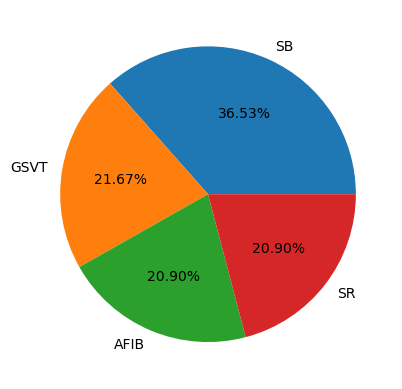

In [7]:
# Dictionary with the 4 groups
#Diagnostics = pd.read_excel('ECG_Data/Diagnostics.xlsx')

Rythms_groups = {'SR':['SR', 'SA'], # SA = sinus irregularity, bad label
                 'AFIB':['AF', 'AFIB'], 
                 'GSVT':['SVT','AT', 'AVNRT', 'AVRT', 'SAAWR', 'ST'],
                 'SB':['SB']}
reverse_groups = {val: key for key, values in Rythms_groups.items() for val in values}

Diagnostics['Rhythm'] = np.array([reverse_groups.get(i, None) for i in Diagnostics['Rhythm']])

# Display the counts of each arrythmia type in the Diagnostics DF
Rhythm_counts = Diagnostics['Rhythm'].value_counts()
print(Rhythm_counts)

# Plot the counts as a pie chart
plt.figure()
plt.pie(Rhythm_counts, labels=Rhythm_counts.index, autopct='%1.2f%%')
plt.show()

If we plot the frequency distributions of all features for each of the groups, we can see that only some of them, including the ventricular rate, atrial rate, QT interval QRS count and Toffset help discern each of the classes

FileName           object
Rhythm             object
PatientAge          int64
Gender             object
VentricularRate     int64
AtrialRate          int64
QRSDuration         int64
QTInterval          int64
QTCorrected         int64
RAxis               int64
TAxis               int64
QRSCount            int64
QOnset              int64
QOffset             int64
TOffset             int64
dtype: object


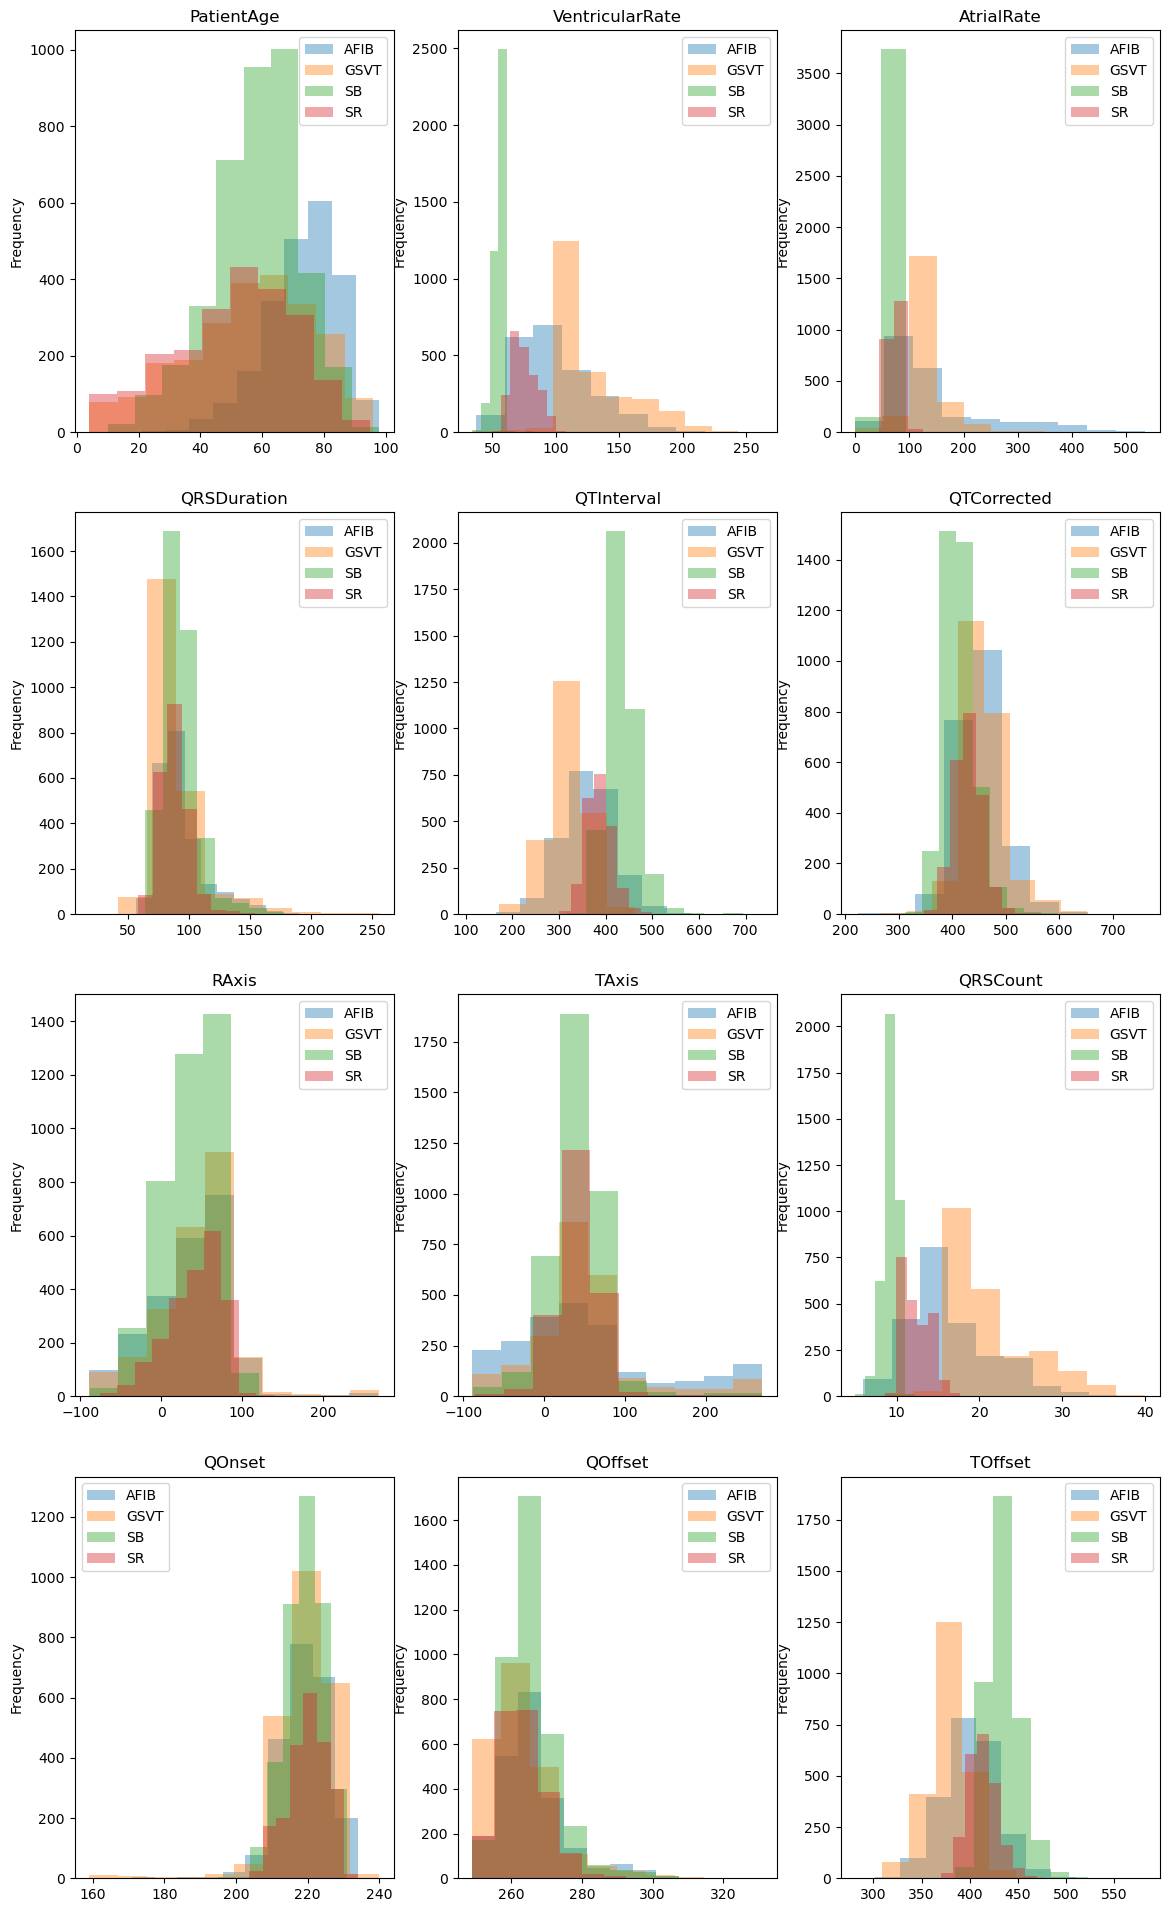

In [8]:
print(Diagnostics.dtypes)

# Convert gender to 0 and 1 code
#Diagnostics['Gender'] = Diagnostics['Gender'].map({'MALE': 1, 'FEMALE': 0})

# Plot each column histogram by each group
groups = Diagnostics.groupby('Rhythm')
int_columns = Diagnostics.select_dtypes('int64').columns

## Calculate the number of rows and columns for the subplots
n = len(int_columns)
ncols = 3 
nrows = n // ncols + (n % ncols > 0)

## Create a new figure with subplots
fig, axs = plt.subplots(nrows, ncols, figsize=(14, 6*nrows))
axs = axs.flatten()

for ax, column in zip(axs, int_columns): # Each column
    for name, group in groups: # Each group
        # Plot the values of the current column and group in the subplot
        group[column].plot(kind='hist', alpha=0.4, label=name, ax=ax)

    ax.legend()
    ax.set_title(column)  # column name as title

## Remove unused subplots
for i in range(n, nrows*ncols):
    fig.delaxes(axs[i])

plt.show()


## Extraction of ECG leads Features

Until now we have a mroe or less balanced dataset with a few key features that can help diagnose each patient's arrhythmias. In this section we will see how to extract more features using the 12 lead ECG of each patient. The whole dataset occupies ~4.5GB

For this we will compare the biological signal processing libraries [BioSPPy](https://github.com/PIA-Group/BioSPPy) and [NeuroKit2](https://github.com/neuropsychology/NeuroKit)

The ECGs come already denoised using [ECGDenoisingTool](https://github.com/zheng120/ECGDenoisingTool/tree/master). First, they utilized a Butterworth low pass filter to eliminate signals with a frequency greater than 50â€‰Hz. Following that, they applied a local polynomial regression smoother (LOESS) to mitigate the effects of baseline wandering. Finally, they employed the Non Local Means (NLM) technique to manage any remaining noise. If we had noisy data, we could use scipy.signal, or otherwise BioSPPy and NeuroKit2 also provide automatic noise filtering functions.

Each ECG has the following Channels: 'I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5' and 'V6'. 

In each channel we can detect with more or less precission, the QRS, P, T valleys and peaks variables as described here: ![Image](https://www.researchgate.net/profile/Sucharita-Mitra/publication/324762381/figure/fig1/AS:622232514613253@1525363200208/Typical-ECG-signal-with-its-distinctive-points-see-online-version-for-colours.png)
[S. Mitra, et al., 2018, IJCSYSE](10.1504/IJCSYSE.2018.10012644)

Given the importance of explainability in healthcare to be able to explain which variables help predict each condition, we will extract the following features from all 12 leads:

### QRS Complex
- Mean height Q
- Var height Q
- Mean width Q
- Var height Q
- Mean prominence Q
- Var prominence Q
- Mean height R
- Var height R
- Mean width R
- Var height R
- Mean prominence R
- Var prominence R
- Mean height S
- Var height S
- Mean width S
- Var height S
- Mean prominence S
- Var prominence S

### Non-QRS
- Mean height P
- Var height P
- Mean width P
- Var height P
- Mean prominence P
- Var prominence P
- Mean height T
- Var height T
- Mean width T
- Var height T
- Mean prominence T
- Var prominence T

### Frequency Bands
According to some [studies](https://www.sciencedirect.com/science/article/pii/S0898122107005019), different heart conditions have differences in the frequency bands of 0-4 and 4-12. To extract some simplified features I will extract the mean power of low (0-4), mid(4-12) and high (12-30) frequency


In [9]:
# Import BioSPPy and NeuroKit2 libraries:
from biosppy import utils
from biosppy import signals
import neurokit2 as nk

# Data directory and list of patients
data_dir = 'ECG_Data/Denoised/'
patient_list = os.listdir(data_dir)

# Channels of each ECG file
channels = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']

We will first visualize all channels of sample ECGs for each condition.
We can observe that all patients have completely different ECG. Thus, we can extract more features from all 12 leads that can help a classification algorithm to diagnose the different arrythmias.
For this we will try Neurokit2 and BioSPPy

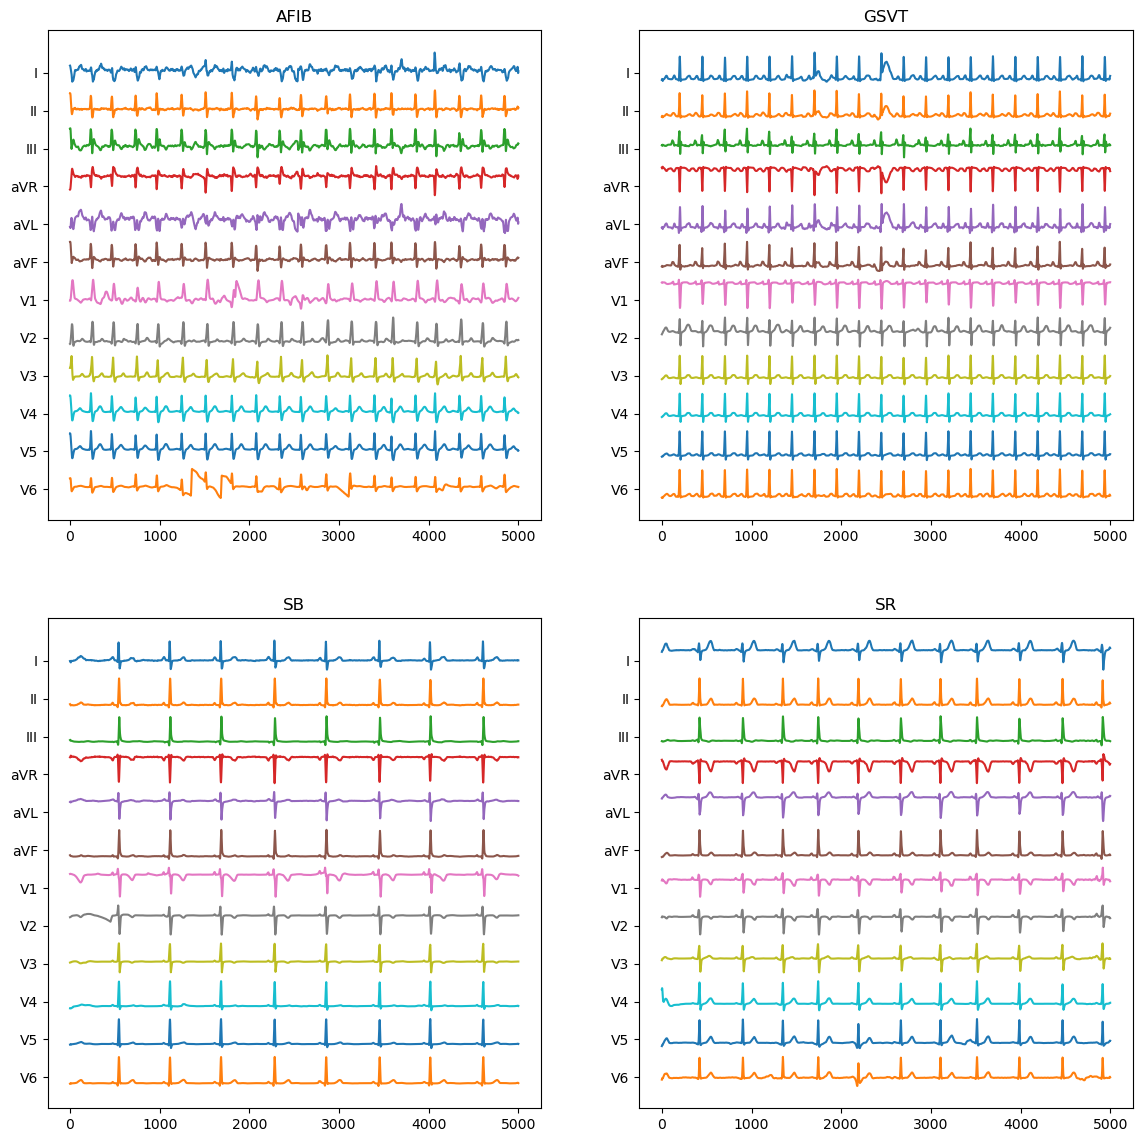

In [10]:
# Import Patient data
# Get one example of each group
patients = Diagnostics.groupby('Rhythm')['FileName'].first() +'.csv'
rhythms = patients.index.to_list()

# Load data  and visualize all ECG channels
fig, axs = plt.subplots(2, 2, figsize=(14, 14))
axs = axs.flatten()

count = -1 # counter
for ax, patient in zip(axs, patients): # Iterate through patients
    # Load patient data
    patient = pd.read_csv(os.path.join(data_dir, str(patient)), header=None, names=channels)

    count +=1 # counter
    y_ticks = [] # append to change yticks with channels

    for i, channel in enumerate(channels): # iterate through channels
        ecg_ch = patient[channel].to_numpy()
        # Min max normalization, -1.3*i to plot each channel below 
        min_max_ecg = (ecg_ch-np.min(ecg_ch)) / (np.max(ecg_ch)-np.min(ecg_ch)) - 1.3*i
        y_ticks.append(-1.3*i+.3) # 
        ax.plot(min_max_ecg)

    _ = ax.set_yticks(y_ticks, channels)

    ax.set_title(rhythms[count])

plt.show()

### Feature extraction with NeuroKit2 
Neurokit2 works quite well when we use the standard 'II' channel of a healthy patient. However, when we try other channels, specially in an unhealthy patient, it struggles detecting the PQRST peaks and valleys. The advantage is that they allow the usage of [multiple algorithms](https://neuropsychology.github.io/NeuroKit/studies/ecg_benchmark.html) to detect the different features, but it has problems with this dataset independently of the method used, both using noised (and their cleaning function) or the denoised dataset. Here we will see a couple of examples one of SR (normal) and one of an AFIB patient.

In [11]:
# Import Patient data
patient_AFIB = str(Diagnostics.iloc[104]['FileName'] + '.csv')
patient_SR = str(Diagnostics.iloc[50]['FileName'] + '.csv')

AFIB = pd.read_csv(os.path.join(data_dir, patient_AFIB), header=None, names=channels)
SR = pd.read_csv(os.path.join(data_dir, patient_SR), header=None, names=channels)


When visualizing the patient with a healthy heart rhythm, in channels 'II' and 'V5', we can extract most peaks/valleys without problems

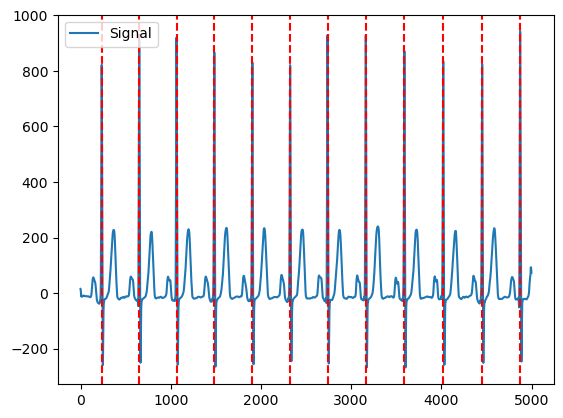

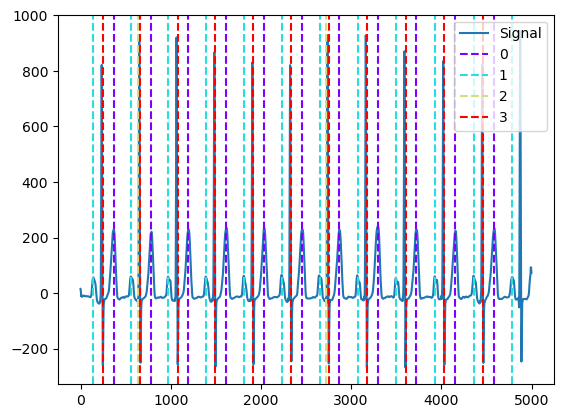

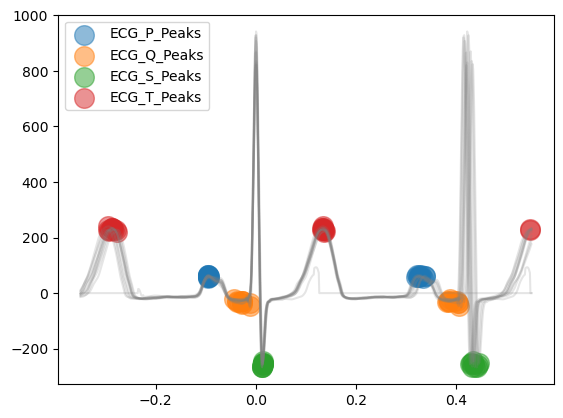

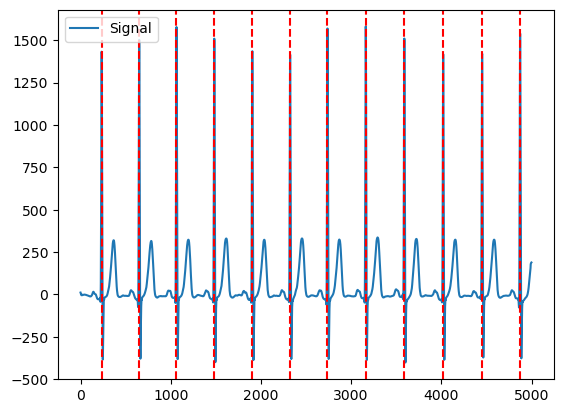

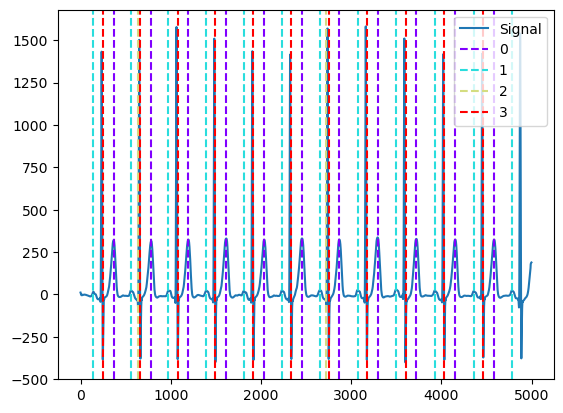

In [12]:
# Detect the R peaks for the II and V5 ECG leads of the normal patient
# II
_, rpeaks = nk.ecg_peaks(SR['II'], sampling_rate=500, method='neurokit')
plot = nk.events_plot(rpeaks['ECG_R_Peaks'], SR['II'])
_, waves_peak = nk.ecg_delineate(SR['V5'], rpeaks, sampling_rate=500, method="dwt")
plot = nk.events_plot([waves_peak['ECG_T_Peaks'], 
                       waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks']], SR['II'])

_, waves_peak = nk.ecg_delineate(SR['II'], rpeaks, sampling_rate=1000, 
                                 method="peak",  show=True, show_type='peaks')

# V5
_, rpeaks = nk.ecg_peaks(SR['V5'], sampling_rate=500, method='neurokit')
plot = nk.events_plot(rpeaks['ECG_R_Peaks'], SR['V5'])
_, waves_peak = nk.ecg_delineate(SR['V5'], rpeaks, sampling_rate=500, method="dwt")
plot = nk.events_plot([waves_peak['ECG_T_Peaks'], 
                       waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks']], SR['V5'])

However, in an AFIB patient, the detection on the reference channel 'II', the R peak detection losses accuracy and missess some of the other peaks/valleys. While trying multiple channels/conditions, I decided to go with BioSPPy as it seemed to be more reliable

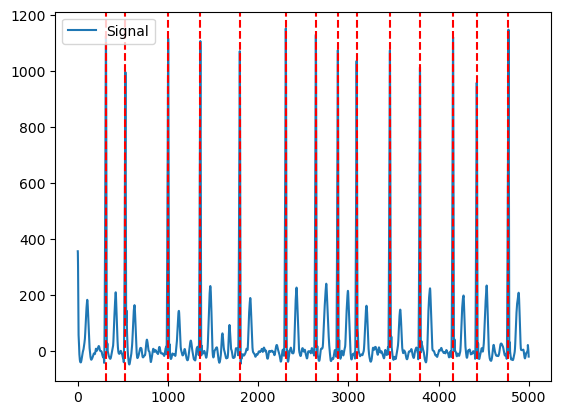

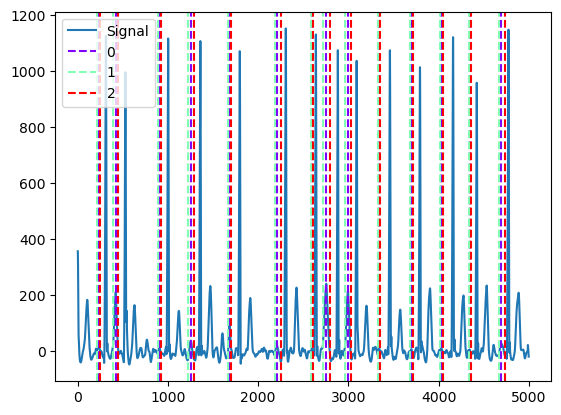

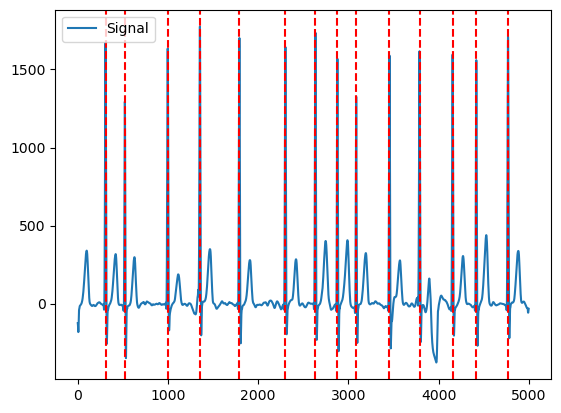

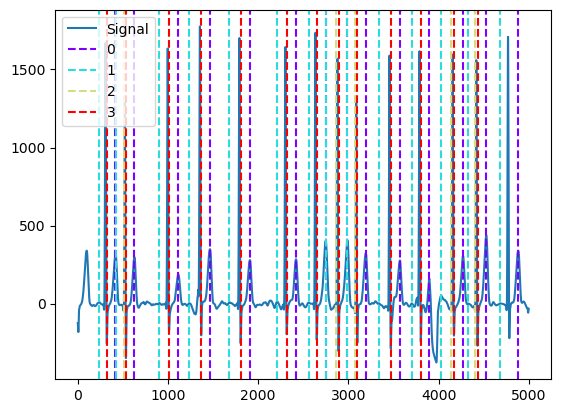

In [13]:
# Detect the R peaks for the II and V5 ECG leads of an AFIB patient

# II
_, rpeaks = nk.ecg_peaks(AFIB['II'], sampling_rate=500, method='neurokit')
plot = nk.events_plot(rpeaks['ECG_R_Peaks'], AFIB['II'])
_, waves_peak = nk.ecg_delineate(AFIB['II'], rpeaks, sampling_rate=500, method="dwt")
plot = nk.events_plot([waves_peak['ECG_P_Peaks'], 
                       waves_peak['ECG_P_Onsets'],
                       waves_peak['ECG_P_Offsets']], 
                       AFIB['II'])

# V5
_, rpeaks = nk.ecg_peaks(AFIB['V5'], sampling_rate=500, method='neurokit')
plot = nk.events_plot(rpeaks['ECG_R_Peaks'], AFIB['V5'])
_, waves_peak = nk.ecg_delineate(AFIB['V5'], rpeaks, sampling_rate=500, method="dwt")
plot = nk.events_plot([waves_peak['ECG_T_Peaks'], 
                       waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks']], AFIB['V5'])


As a bonus point for neurokit2, it allows for extracting the respiratory rate out of ECG data

0.6578608823426108


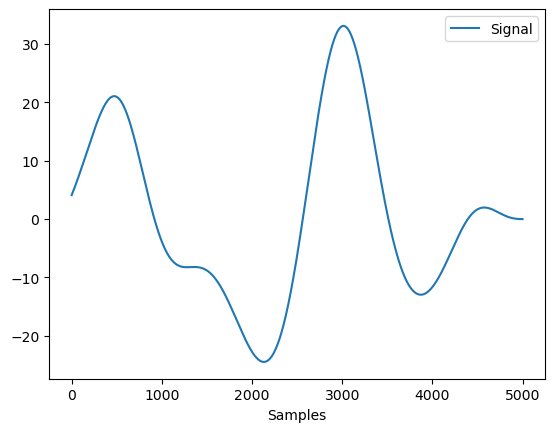

In [14]:
# Add respiratory
ecg_rate = nk.ecg_rate(rpeaks, sampling_rate=500, desired_length=len(AFIB['II']))# Compute rate
edr = nk.ecg_rsp(ecg_rate, sampling_rate=500) # Analyse EDR

# Visual comparison
nk.signal_plot(edr)
print(np.mean(edr))

### Feature Extraction with Biosspy
Biosspy allows similar feature extraciton than NeuroKit2, but as we can see, it detects ECG features more accurately. Here we can visualize how the ECG profile for a healthy patients vs one with AFIB

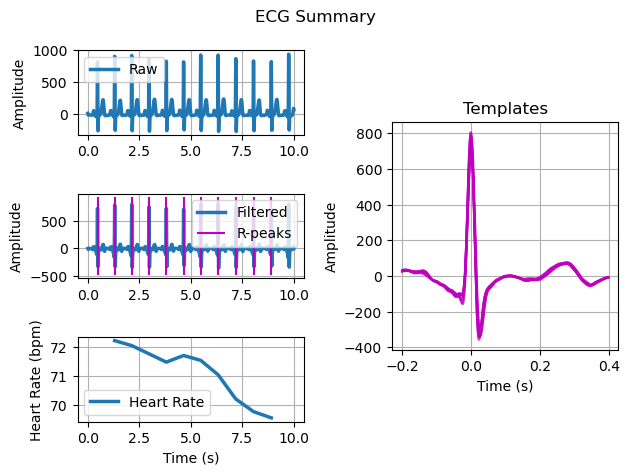

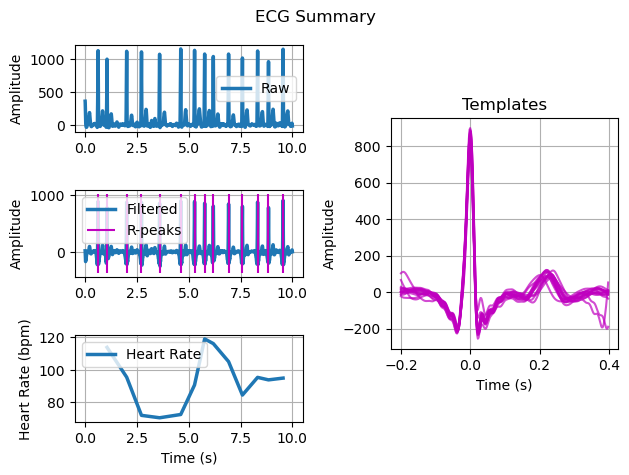

In [15]:
# Variables outputs of the biosppy
outputs_ecg = ('ts', 'filtered', 'rpeaks', 'templates_ts',
                'templates', 'heart_rate_ts', 'heart_rate')

# SR
ecg_proc = utils.ReturnTuple(# Process ecg: detects R peaks and HR
        signals.ecg.ecg(SR['II'], sampling_rate=500, show=True, interactive=False),
        outputs_ecg)
# AFIB
ecg_proc_AFIB = utils.ReturnTuple(# Process ecg: detects R peaks and HR
        signals.ecg.ecg(AFIB['II'], sampling_rate=500, show=True, interactive=False),
        outputs_ecg)

We can extract the rest of the peaks and valleys and calculate the rest of the features as follows

In [16]:
ecg_signal = SR['II'].to_numpy()

# Basic features
## Kurtosis
kurtosis = signals.ecg.kSQI(ecg_signal)
## Flatline percentage: % of signal where the abs value of the dx is lower than threshold
flatline_percentage = signals.ecg.pSQI(ecg_signal, f_thr=0.01)
## Skewness
skewness = signals.ecg.sSQI(ecg_signal)

## Band power
band_powers = dict()
freqs, power = signals.tools.power_spectrum(ecg_signal, 500) # Power spectrum
bands = {'Hz0to4': [0, 3.999], 'Hz4to12': [4, 11.999], 'Hz12to30': [12, 29.999]}
for band, freq_range in bands.items():
        band_powers[band] = signals.tools.band_power(freqs, power, freq_range).as_dict().values()

# QRS Complex
Q_positions, Q_start_positions = signals.ecg.getQPositions(ecg_proc, show=False)
S_positions, S_end_positions = signals.ecg.getSPositions(ecg_proc, show=False) 

## R
### R Height
mean_H_R = np.nanmean(ecg_signal[ecg_proc['rpeaks']])
var_H_R = np.nanvar(ecg_signal[ecg_proc['rpeaks']])
### R Prominence
R_Ps = np.nanmin(np.stack([
        ecg_signal[ecg_proc['rpeaks']]-ecg_signal[Q_positions],
        ecg_signal[ecg_proc['rpeaks']]-ecg_signal[S_positions] ]), axis = 0)
mean_P_R = np.nanmean(R_Ps)
var_P_R = np.nanvar(R_Ps)

## Q
### Q Height
mean_H_Q = np.nanmean(ecg_signal[Q_positions])
var_H_Q = np.nanvar(ecg_signal[Q_positions])
### Q Prominence
Q_Ps = np.nanmin(np.stack([ # substract closests countours, mix in array, calculate min of each diff
        ecg_signal[Q_positions]-ecg_signal[ecg_proc['rpeaks']],
        ecg_signal[Q_positions]-ecg_signal[Q_start_positions] ]), axis = 0)
mean_P_Q = np.nanmean(Q_Ps)
var_P_Q = np.nanvar(Q_Ps)    

## S
### S Height
mean_H_S = np.nanmean(ecg_signal[S_positions])
var_H_S = np.nanvar(ecg_signal[S_positions])
### S Prominence
S_Ps = np.nanmin(np.stack([
        ecg_signal[S_positions]-ecg_signal[ecg_proc['rpeaks']],
        ecg_signal[S_positions]-ecg_signal[S_end_positions] ]), axis = 0)
mean_P_S = np.nanmean(S_Ps)
var_P_S = np.nanvar(S_Ps)                

## Mean_W_QRS and var_W_QRS in ms (1/500*1000)
mean_W_QRS = np.nanmean((ecg_signal[S_end_positions] - ecg_signal[Q_start_positions])*2)
var_W_QRS = np.nanvar((ecg_signal[S_end_positions] - ecg_signal[Q_start_positions])*2)


# Non QRS complex
## T
T_positions, T_start_positions, T_end_positions = signals.ecg.getTPositions(ecg_proc, show=False) # T pos
### T Height
mean_H_T = np.nanmean(ecg_signal[T_positions])
var_H_T = np.nanvar(ecg_signal[T_positions])
### T Width (ms)
mean_W_T = np.nanmean((ecg_signal[T_end_positions] - ecg_signal[T_start_positions])*2)
var_W_T = np.nanvar((ecg_signal[T_end_positions] - ecg_signal[T_start_positions])*2)
### T Prominence
T_Ps = np.nanmin(np.stack([ 
        ecg_signal[T_positions]-ecg_signal[T_end_positions],
        ecg_signal[T_positions]-ecg_signal[T_start_positions] ]), axis = 0)
mean_P_T = np.nanmean(T_Ps)
var_P_T = np.nanvar(T_Ps)


### P
# Unfortunately, BioSSPy has a problem extrac5ting the P position in most cases as it creates an interval around the R
# peaks that prevents the detection of P. When possible:
try:
        P_positions, P_start_positions, P_end_positions = signals.ecg.getPPositions(ecg_proc, show=False) # T pos
        ### P Height
        mean_H_P = np.nanmean(ecg_signal[P_positions])
        var_H_P = np.nanvar(ecg_signal[P_positions])
        ### P Width (ms)
        mean_W_P = np.nanmean((ecg_signal[P_end_positions] - ecg_signal[P_start_positions])*2)
        var_W_P = np.nanvar((ecg_signal[P_end_positions] - ecg_signal[P_start_positions])*2)
        ### P Prominence
        P_Ps = np.nanmin(np.stack([ 
                ecg_signal[P_positions]-ecg_signal[P_end_positions],
                ecg_signal[P_positions]-ecg_signal[P_start_positions] ]), axis = 0)
        mean_P_P = np.nanmean(P_Ps)
        var_P_P = np.nanvar(P_Ps)
except:
        pass

## Non-QRS W
nonQRS_intervals = np.array([S_end_positions[i] - Q_start_positions[i+1]
        for i in range(len(T_end_positions)-1)])*2
mean_W_nonQRS = np.nanmean(nonQRS_intervals)
var_W_nonQRS = np.nanvar(nonQRS_intervals)

T_positions, T_start_positions, T_end_positions = signals.ecg.getTPositions(ecg_proc, show=False) 


To extract all ECG Features we just need to iterate through all the chabnnels and patients using the function ECG_Features.py

In [17]:
# Run function, save X and Y in Train_Test_Data
X = extract_ECG_features(data_dir, sr=500)

# Concatenate X with the features already in Diagnostics
X =  pd.concat([Diagnostics.drop(columns=['Rhythm']), X], axis=1)#.drop_duplicates().reset_index(drop=True)


Starting with file '0', filename: MUSE_20180111_155115_19000.csv
Starting with file '500', filename: MUSE_20180112_120220_76000.csv
Starting with file '1000', filename: MUSE_20180112_133542_15000.csv
Starting with file '1500', filename: MUSE_20180113_075504_29000.csv
Starting with file '2000', filename: MUSE_20180113_130244_12000.csv
Starting with file '2500', filename: MUSE_20180113_173554_96000.csv
Starting with file '3000', filename: MUSE_20180114_070702_72000.csv
Starting with file '3500', filename: MUSE_20180114_115823_24000.csv
Starting with file '4000', filename: MUSE_20180114_130723_39000.csv
Starting with file '4500', filename: MUSE_20180115_120048_89000.csv
Starting with file '5000', filename: MUSE_20180115_131751_16000.csv
Starting with file '5500', filename: MUSE_20180116_123824_18000.csv
Starting with file '6000', filename: MUSE_20180116_170039_80000.csv
Starting with file '6500', filename: MUSE_20180118_122950_89000.csv
Starting with file '7000', filename: MUSE_20180118_1

In [22]:
# Clean X of unusable features or unreadablebad quality ecg_signals
## Filter features with more than 1000 missing values (in columns)
#counts = X.isna().sum()
print(counts.sort_values()) # P mostly missing
#X = X.dropna(axis=1, thresh=X.shape[0]-1000)

## Filter rows with more than 20 missing features
total_patients = X.shape[0]
X = X.dropna(axis=0, thresh=X.shape[1]-20)
print(str(total_patients - X.shape[0]) + ' ecg files wiht more than 20 missing features')

## Delete the rest of the features with nans
X = X.dropna(axis=1)

# Save X
X.to_csv('Train_Test_Data/X.csv')

FileName            0
TOffset             0
QOffset             0
QRSCount            0
TAxis               0
                ...  
aVR_mean_P_P    10302
aVR_var_P_P     10302
aVR_var_W_P     10302
aVR_mean_W_P    10302
aVR_var_H_P     10302
Length: 422, dtype: int64
0 ecg files wiht more than 20 missing features


Create and save labels

In [23]:
# Group label rythms already grouped from before
y = Diagnostics['Rhythm']

# Filter bad quality/undetectable ecg
y = y[X.index]

# Save y
y.to_csv('Train_Test_Data/y.csv')